## Generación de Archivos .vasp de la Estructuras Rotadas ##

In [1]:
from ase.build import bulk
from ase.visualize.plot import plot_atoms
from ase.build.surfaces_with_termination import surfaces_with_termination
import matplotlib.pyplot as plt
import numpy as np
import Tools as tl
from ase.build import sort

In [2]:
zrhcp = bulk('Zr', crystalstructure='hcp')
zrortho = bulk('Zr', crystalstructure='hcp', orthorhombic=True)

Zr0001 = surfaces_with_termination(zrortho, (0, 0, 1), 5, vacuum=10, termination='Zr')

Zr11m20 = surfaces_with_termination(zrortho, (1, 0, 0), 5, vacuum=10, termination='Zr')

Zr10m10 = surfaces_with_termination(zrortho, (0, 1, 0), 5, vacuum=10, termination='Zr')

rotated = []
RotAdStruc = []
dang = 15  # saltos entre los ángulos siguientes
planos = ('11m20', '0001', '10m10')
surfaces = (Zr11m20, Zr0001, Zr10m10)
for i in range(0, len(planos)):
    ZrSurface = surfaces[i]
    plano = planos[i]
    for ang in range(75, 91, dang):
        rotated.append(sort(ZrSurface[0].copy()))
        rotated[-1].center()
        rotated[-1].rotate(ang, 'z', center="com")
        tl.get_adsite(rotated[-1], site='top', face='bottom')   # bottom para metal
        print(rotated[-1].info)
        RotAdStruc.append(tl.make_adstruc(rotated[-1], 'RotBotTop', theface='bottom', thesite='top'))
        name = f'{ang}_{plano}_rotated.vasp'
        rotated[-1].write(name, direct=True, sort=True)

{'adatom': {'bottom': {'top': array([ 3.55712186,  0.43846533, 10.        ])}}}
{'adatom': {'bottom': {'top': array([ 4.08360955,  0.70785363, 10.        ])}}}
{'adatom': {'bottom': {'top': array([ 2.7246456 ,  3.33591893, 10.        ])}}}
{'adatom': {'bottom': {'top': array([ 2.54742068,  3.60476205, 10.        ])}}}
{'adatom': {'bottom': {'top': array([ 2.12564113,  3.06651265, 10.        ])}}}
{'adatom': {'bottom': {'top': array([ 1.765195 ,  2.9013475, 10.       ])}}}


(<Axes:>, <Axes:>, <Axes:>)

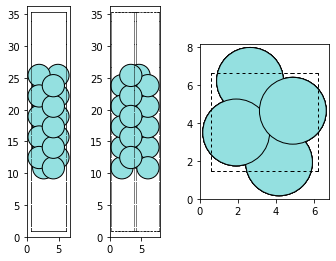

In [13]:
tl.plotviews(rotated[0])

In [14]:
rotated[0].get_global_number_of_atoms()

20

In [9]:
rotatedsymmetric = tl.make_symmetric(rotated[0], natoms=2)

(<Axes:>, <Axes:>, <Axes:>)

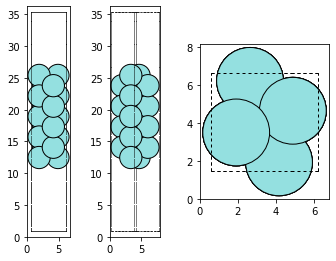

In [10]:
tl.plotviews(rotatedsymmetric)

In [12]:
rotatedsymmetric.get_global_number_of_atoms()

18

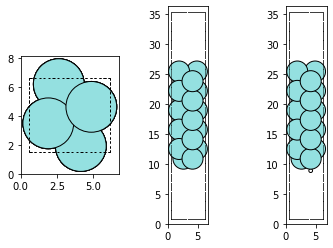

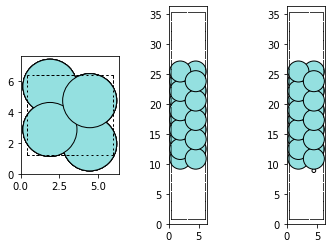

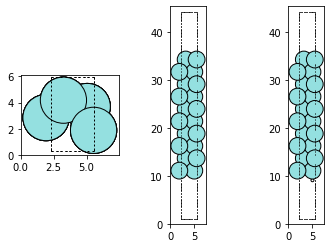

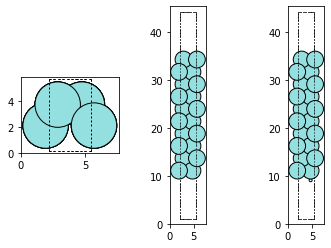

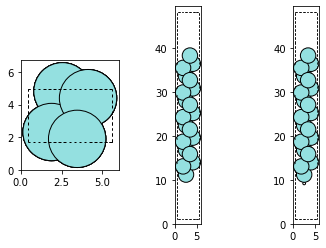

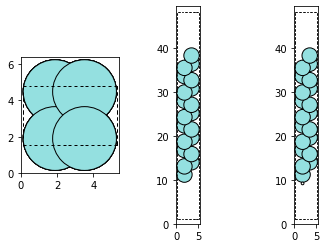

In [8]:
for i, thisatoms in enumerate(rotated):
    fig, ax = plt.subplots(1, 3)
    plot_atoms(thisatoms, ax=ax[0])
    plot_atoms(thisatoms, ax=ax[1], rotation="-90x")
    plot_atoms(RotAdStruc[i], ax=ax[2], rotation='-90x')